In [37]:
import lichess.api
from lichess.format import PYCHESS
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from datetime import datetime
import pandas as pd
import calendar
from pprint import pprint

In [2]:
user = lichess.api.user('GarethC13')
print(user['perfs']['bullet']['rating'])

1870


In [3]:
# gameslist = list(lichess.api.user_games('GarethC13', max=3000, perfType='bullet'))
# with open('gameslist.pkl', 'wb') as f:
#     pickle.dump(gameslist, f)
with open('gameslist.pkl', 'rb') as f:
    gameslist = pickle.load(f)
    
whitegames = [game for game in gameslist if game['players'].get('white').get('user').get('id') == 'garethc13']
blackgames = [game for game in gameslist if game['players'].get('white').get('user').get('id') != 'garethc13']
print(len(gameslist),'total bullet games.')
print(len(whitegames),'as white.')
print(len(blackgames),'as black.')

3000 total bullet games.
1505 as white.
1495 as black.


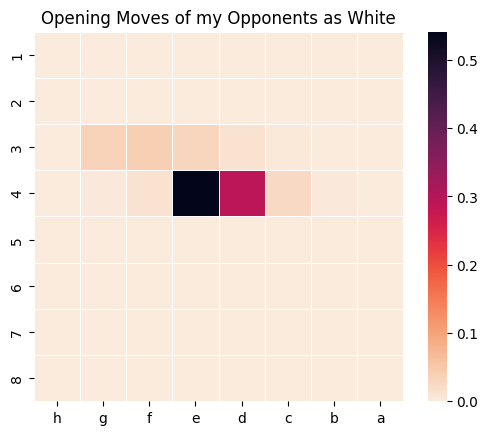

1484

In [4]:
move = ['a3','a4','b3','b4','c3','c4','d3','d4','e3','e4','f3','f4','g3','g4','h3','h4','Nf3','Nb3','Na3','Nh3']
squares = [[2,7],[3,7],[2,6],[3,6],[2,5],[3,5],[2,4],[3,4],[2,3],[3,3],[2,2],[3,2],[2,1],[3,1],[2,0],[3,0],
           [2,2],[2,6],[2,7],[2,0]]
values = [sum(1 for i in blackgames if i['moves'].split()[0] == m) for m in move]
data = np.zeros([8, 8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values
data_avg = data/sum(sum(data))   

cmap = sns.cm.rocket_r
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]
ax = sns.heatmap(data_avg, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap=cmap, linewidth=0.5)
plt.title('Opening Moves of my Opponents as White')
plt.savefig('openings.png')
plt.show()
sum(values)

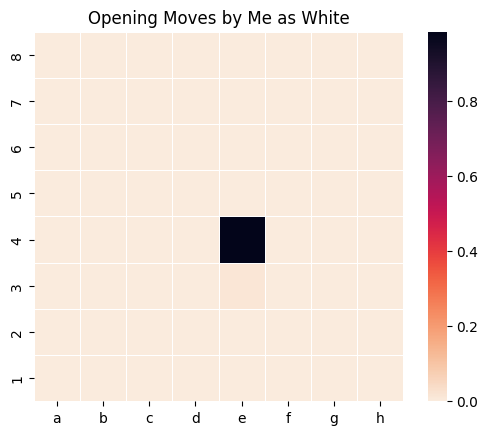

[0, 0, 3, 0, 0, 0, 0, 1, 21, 1477, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0]


In [5]:
move = ['a3','a4','b3','b4','c3','c4','d3','d4','e3','e4','f3','f4','g3','g4','h3','h4','Nf3','Nb3','Na3','Nh3']
squares = [[2,7],[3,7],[2,6],[3,6],[2,5],[3,5],[2,4],[3,4],[2,3],[3,3],[2,2],[3,2],[2,1],[3,1],[2,0],[3,0],
           [2,2],[2,6],[2,7],[2,0]]
values = [sum(1 for i in whitegames if i['moves'].split()[0] == m) for m in move]
data = np.zeros([8, 8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values
data_avg = data/sum(sum(data))    
    
x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]

ax = sns.heatmap(data_avg,square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels,cmap=cmap, linewidth=0.5)
plt.title('Opening Moves by Me as White')
ax.invert_xaxis()
ax.invert_yaxis()
plt.show()
print(values)

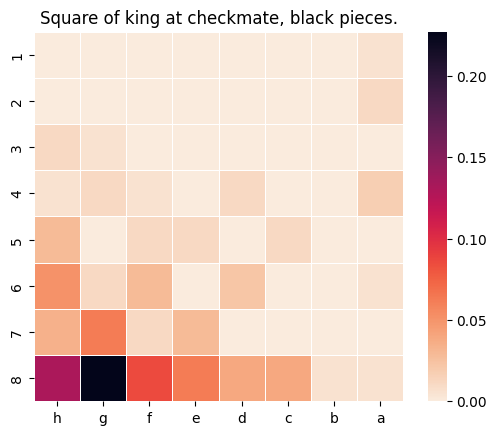

In [6]:
letters = ['a','b','c','d','e','f','g','h']
move = [i + str(j) for i in letters for j in range(1, 9)]
values = [0]*64
squares = [[i, x] for x in range(7, -1, -1) for i in range(8)]

for x in blackgames:
    if x['status'] == 'mate' and x['winner'] == 'white':
        y = list(x['moves'].split(' '))[1::2]
        king = 0
        for i in y:
            if i[0] == 'K':
                king = i[-2:]
            elif i == 'O-O':
                king = 'g8'
            elif i == 'O-O-O':
                king = 'c8'
        for m,v in zip(move,range(64)):
            if m == king:
                values[v] += 1
        if king == 0:
            values[39] += 1
            
data = np.zeros([8,8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values

x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]
data = data/(sum(sum(data)))
ax = sns.heatmap(data, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap=cmap, linewidth=0.5)
plt.title('Square of king at checkmate, black pieces.')
plt.savefig('blackmate.png')
plt.show()

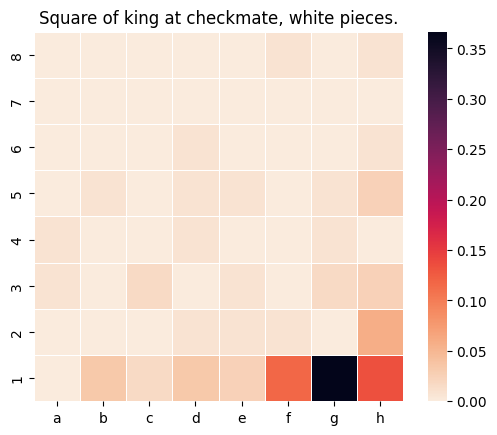

In [7]:
letters = ['a','b','c','d','e','f','g','h']
move = [i + str(j) for i in letters for j in range(1, 9)]
values = [0]*64
squares = [[i, x] for x in range(7, -1, -1) for i in range(8)]
        
for x in whitegames:
    if x['status'] == 'mate' and x['winner'] == 'black':
        y = list(x['moves'].split(' '))[0::2]
        king = 0
        for i in y:
            if i[0] == 'K':
                king = i[-2:]
            elif i == 'O-O':
                king = 'g1'
            elif i == 'O-O-O':
                king = 'c1'
        for m,v in zip(move,range(64)):
            if m == king:
                values[v] += 1
        if king == 0:
            values[32] += 1
            
data = np.zeros([8,8])
data[[s[0] for s in squares], [s[1] for s in squares]] = values

x_axis_labels = ['h','g','f','e','d','c','b','a']
y_axis_labels = [*range(1,9)]
data = data/(sum(sum(data)))
ax = sns.heatmap(data, square=True, xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap=cmap, linewidth=0.5)
plt.title('Square of king at checkmate, white pieces.')
ax.invert_xaxis()
ax.invert_yaxis()
plt.savefig('whitemate.png')
plt.show()

My average rating: 1772.83 



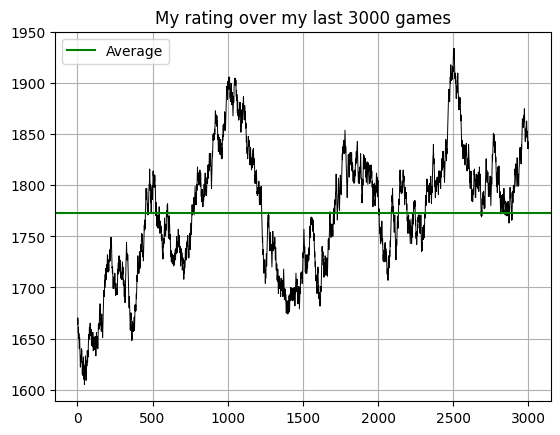

In [8]:
my_rating = [game['players'].get('white').get('rating') if game['players'].get('white').get('user').get('id') == 'garethc13' else
           game['players'].get('black').get('rating') for game in gameslist]
my_rating.reverse()

plt.plot([*range(1,3001)], my_rating, color='k', linewidth=0.7)
plt.axhline(y=np.mean(my_rating), color='g', label="Average")
plt.title("My rating over my last 3000 games")
plt.legend()
plt.grid()
print("My average rating:", round(np.mean(my_rating), 2), "\n")

My average rating: 1774.43 



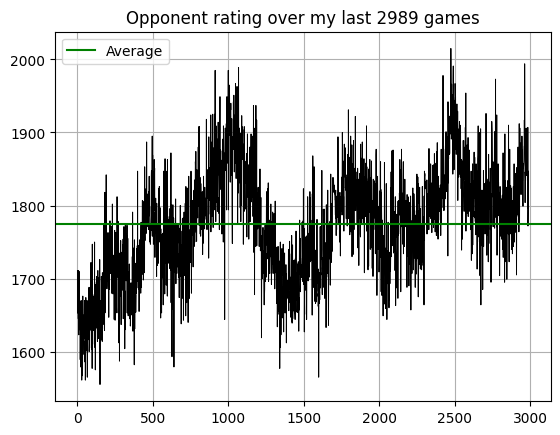

In [9]:
opponent_rating = [game['players'].get('white').get('rating') if game['players'].get('white').get('user').get('id') != 'garethc13' else
           game['players'].get('black').get('rating') for game in gameslist]
opponent_rating.reverse()
adjusted_opponent_rating = [r for r in opponent_rating if r > 1550] # remove games against lower rated friends

plt.plot([*range(1,len(adjusted_opponent_rating) + 1)], adjusted_opponent_rating, color='k', linewidth=0.7)
plt.axhline(y = np.mean(adjusted_opponent_rating), color='g', label="Average")
plt.title(f"Opponent rating over my last {len(adjusted_opponent_rating)} games")
plt.legend()
plt.grid()
print("My average rating:", round(np.mean(adjusted_opponent_rating), 2), "\n")

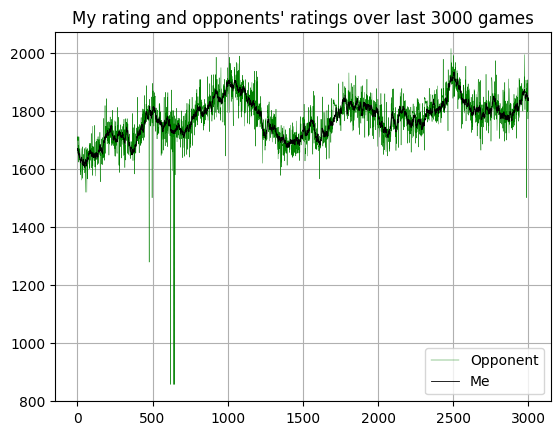

In [51]:
plt.plot([*range(1,3001)], opponent_rating, color='g', linewidth=0.3, label="Opponent")
plt.plot([*range(1,3001)], my_rating, color='k', linewidth=0.6, label="Me")
plt.title("My rating and opponents' ratings over last 3000 games")
plt.legend()
plt.grid()
plt.show()

In [43]:
day_dict = {day: {'total':0,'win':0,'draw':0,'loss':0} for day in calendar.day_name}
hour_dict = {key: {'total':0,'win':0,'draw':0,'loss':0} for key in range(24)}

for game in gameslist:
    day = datetime.fromtimestamp(game.get('createdAt')/1000).strftime("%A")
    time = datetime.fromtimestamp(game.get('createdAt')/1000).hour
    colour = "white" if game.get('players').get('white').get('user').get('id') == "garethc13" else "black"
    winner = game.get('winner')
    result = "win" if colour == winner else("draw" if winner == None else "loss")
    day_dict[day][result] += 1
    day_dict[day]['total'] += 1
    hour_dict[time][result] += 1
    hour_dict[time]['total'] += 1
    
pprint(day_dict)
print()
pprint(hour_dict)

{'Friday': {'draw': 20, 'loss': 189, 'total': 424, 'win': 215},
 'Monday': {'draw': 21, 'loss': 295, 'total': 635, 'win': 319},
 'Saturday': {'draw': 15, 'loss': 146, 'total': 314, 'win': 153},
 'Sunday': {'draw': 19, 'loss': 160, 'total': 330, 'win': 151},
 'Thursday': {'draw': 15, 'loss': 195, 'total': 375, 'win': 165},
 'Tuesday': {'draw': 22, 'loss': 214, 'total': 454, 'win': 218},
 'Wednesday': {'draw': 22, 'loss': 232, 'total': 468, 'win': 214}}

{0: {'draw': 3, 'loss': 28, 'total': 61, 'win': 30},
 1: {'draw': 0, 'loss': 20, 'total': 40, 'win': 20},
 2: {'draw': 0, 'loss': 1, 'total': 2, 'win': 1},
 3: {'draw': 0, 'loss': 0, 'total': 0, 'win': 0},
 4: {'draw': 0, 'loss': 1, 'total': 1, 'win': 0},
 5: {'draw': 0, 'loss': 0, 'total': 0, 'win': 0},
 6: {'draw': 0, 'loss': 0, 'total': 0, 'win': 0},
 7: {'draw': 1, 'loss': 5, 'total': 10, 'win': 4},
 8: {'draw': 1, 'loss': 19, 'total': 41, 'win': 21},
 9: {'draw': 0, 'loss': 48, 'total': 92, 'win': 44},
 10: {'draw': 6, 'loss': 71, '

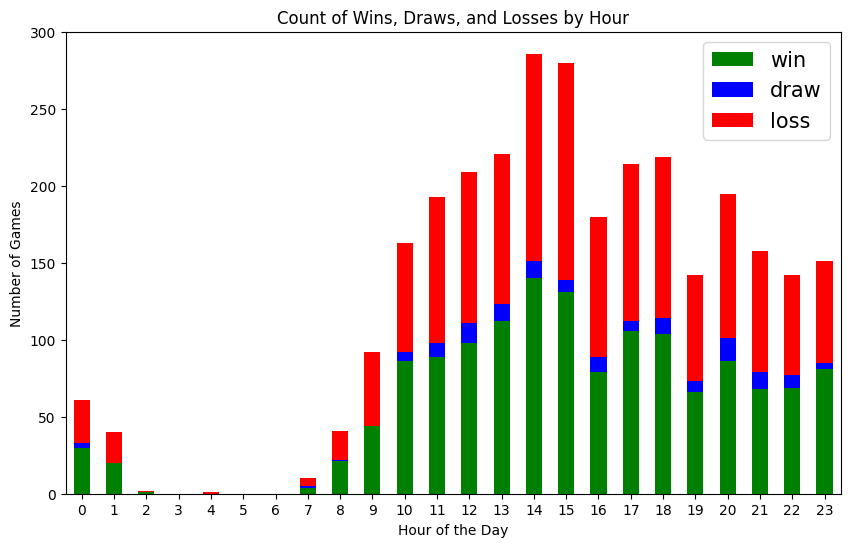

In [49]:
df = pd.DataFrame(hour_dict).T

fig, ax = plt.subplots(figsize=(10, 6))
df[['win', 'draw', 'loss']].plot(kind='bar', stacked=True, ax=ax, color=['green', 'blue', 'red'])
plt.xlabel("Hour of the Day")
plt.xticks(rotation=0)
plt.ylabel("Number of Games")
plt.legend(fontsize=15)
plt.title("Count of Wins, Draws, and Losses by Hour")
plt.show()

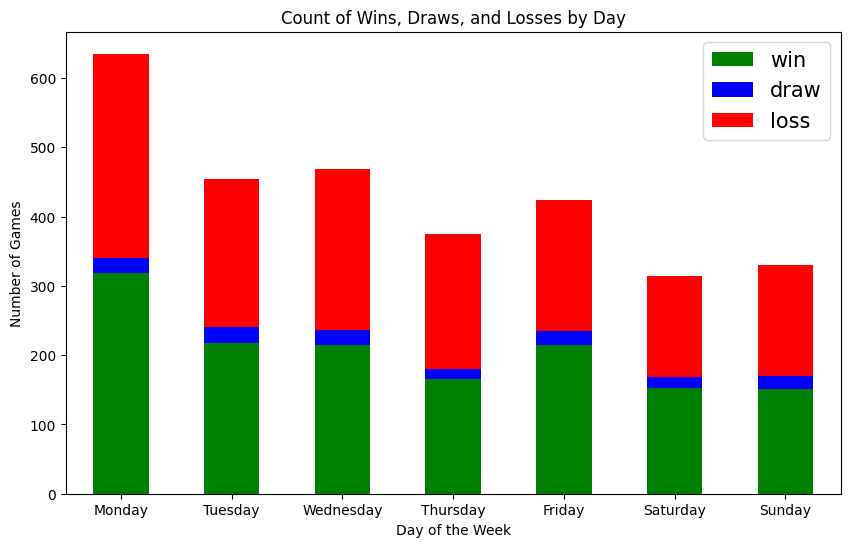

In [96]:
df = pd.DataFrame(day_dict).T

fig, ax = plt.subplots(figsize=(10, 6))
df[['win', 'draw', 'loss']].plot(kind='bar', stacked=True, ax=ax, color=['green', 'blue', 'red'])
plt.xlabel("Day of the Week")
plt.xticks(rotation=0)
plt.ylabel("Number of Games")
plt.legend(fontsize=15)
plt.title("Count of Wins, Draws, and Losses by Day")
plt.show()

In [99]:
statuses = {game.get('status') for game in gameslist}
status_dict = {status: {key:0 for key in ('win', 'draw', 'loss', 'total')} for status in statuses}

for game in gameslist:
    colour = "white" if game.get('players').get('white').get('user').get('id') == "garethc13" else "black"
    winner = game.get('winner')
    result = "win" if colour == winner else("draw" if winner == None else "loss")
    status = game.get('status')
    status_dict[status][result] += 1
    status_dict[status]['total'] += 1

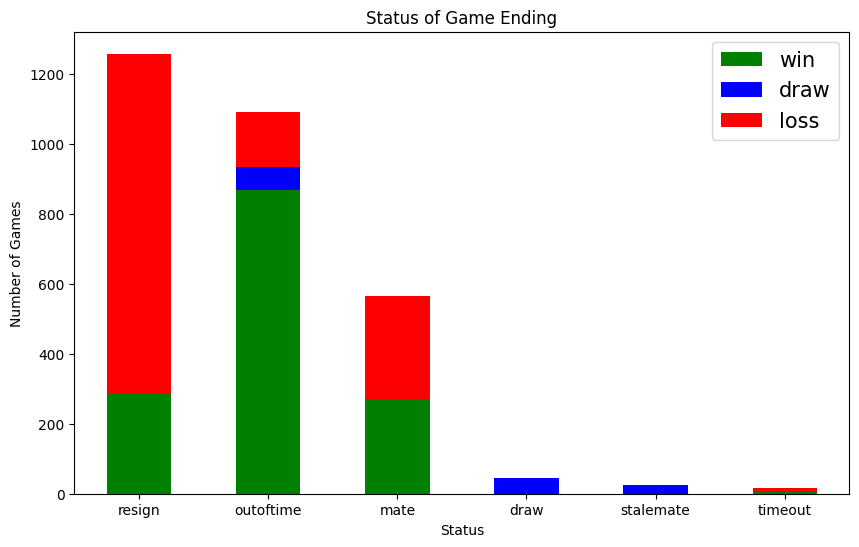

In [103]:
df = pd.DataFrame(status_dict).T.sort_values(by='total', ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
df[['win', 'draw', 'loss']].plot(kind='bar', stacked=True, ax=ax, color=['green', 'blue', 'red'])
plt.xlabel("Status")
plt.xticks(rotation=0)
plt.ylabel("Number of Games")
plt.legend(fontsize = 15)
plt.title("Status of Game Ending")
plt.show()
# timeout refers to when a player leaves the game/disconnects

In [147]:
game_lengths = [(game.get('lastMoveAt') - game.get('createdAt'))/1000 for game in gameslist]
moves = [len(game.get('moves').split()) for game in gameslist]
print("Average game length, including time before each player makes first move: ",round(np.mean(game_lengths),1), "s", sep = '')
print("Average total number of moves per game:", int(round(np.mean(moves),0)))

Average game length, including time before each player makes first move: 89.5s
Average total number of moves per game: 66


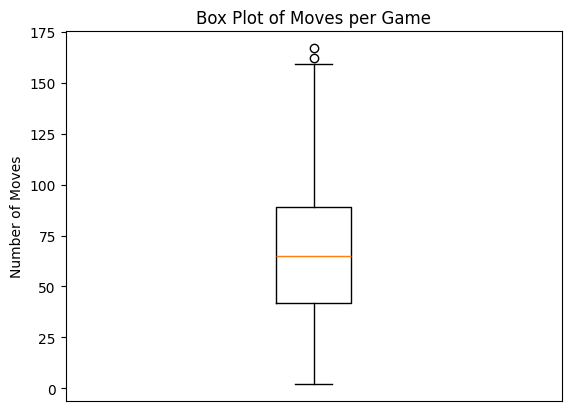

In [153]:
plt.boxplot(moves)
plt.ylabel('Number of Moves')
plt.title('Box Plot of Moves per Game')
plt.xticks([]) 
plt.show()

In [154]:
# animation of game moves?
gameslist[0]

{'id': 'Ete4kTua',
 'rated': True,
 'variant': 'standard',
 'speed': 'bullet',
 'perf': 'bullet',
 'createdAt': 1726590048124,
 'lastMoveAt': 1726590150465,
 'status': 'outoftime',
 'source': 'pool',
 'players': {'white': {'user': {'name': 'Mantagasm', 'id': 'mantagasm'},
   'rating': 1842,
   'ratingDiff': -6},
  'black': {'user': {'name': 'GarethC13', 'id': 'garethc13'},
   'rating': 1836,
   'ratingDiff': 6}},
 'winner': 'black',
 'moves': 'e4 g6 Nf3 Bg7 d4 e6 c4 Ne7 Nc3 c6 Be3 O-O Be2 d5 O-O dxc4 Qd2 b5 Bh6 Bd7 Bxg7 Kxg7 Ne5 Ng8 Bf3 f6 Nxd7 Nxd7 Rae1 Nb6 e5 f5 Bxc6 Nd7 Bxa8 Qxa8 d5 exd5 Nxd5 Rd8 e6 Ndf6 e7 Rxd5 Qe3 Qe8 Qe6 h5 Re3 Ne4 f3 Nc5 Rfe1 Nxe6 Rxe6 Nf6 h4 Nd7 Ra6 Nc5 Rxa7 Nd3',
 'clock': {'initial': 60, 'increment': 0, 'totalTime': 60}}

dict